In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def show(title, image, cmap=None):
    plt.figure()
    if len(image.shape) == 2:  # Grayscale (mask or gray img)
        plt.imshow(image, cmap="gray")
    else:  # Color (ensure RGB for matplotlib)
        plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()


In [21]:
img = cv.imread("pictures/dog.jpg")
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


#### GrayScale histogram

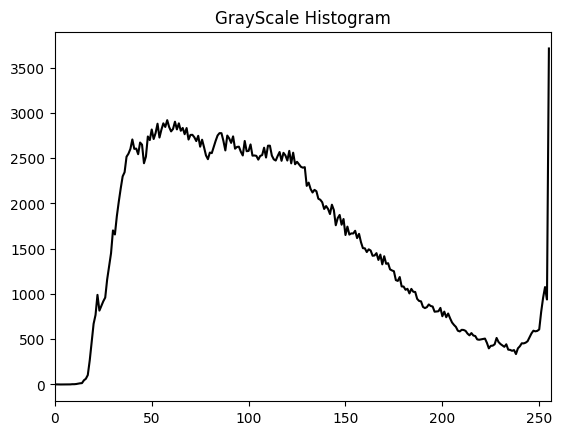

In [22]:
hist_gray = cv.calcHist([gray],[0],None,[256],[0,256])
plt.figure()
plt.plot(hist_gray,color ='black')
plt.title("GrayScale Histogram")
plt.xlim([0,256])
plt.show()

#### 2.Color Histogram

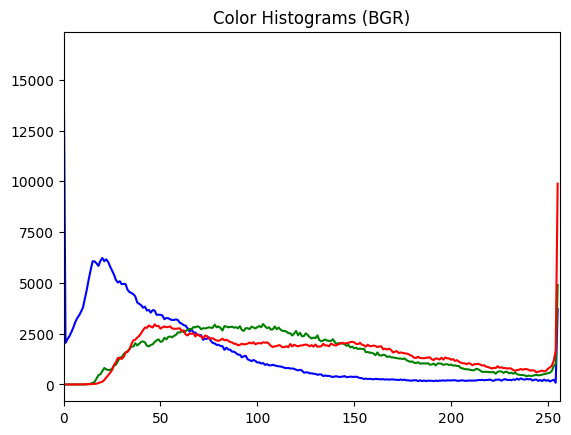

In [23]:
colors = ('b', 'g', 'r')
plt.figure()
for i, c in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=c)
plt.title("Color Histograms (BGR)")
plt.xlim([0,256])
plt.show()

#### 3. masked Histograms

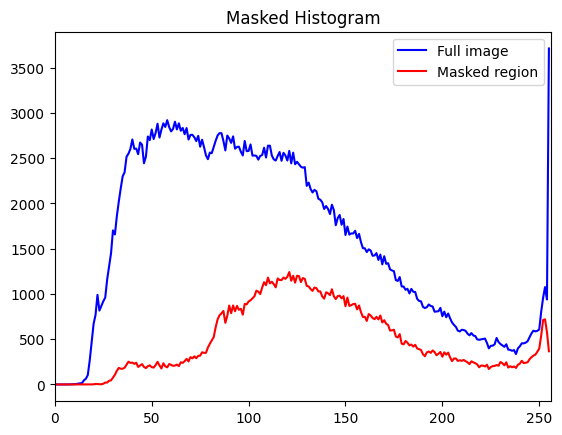

In [27]:
mask = np.zeros(gray.shape,np.uint8)
cv.circle(mask,(gray.shape[1]//3 + 150,gray.shape[0]//3),200,255,-1)

hist_full = cv.calcHist([gray],[0],None,[256],[0,256])
hist_mask = cv.calcHist([gray],[0],mask,[256],[0,256])

plt.figure()
plt.plot(hist_full,label = "Full image",color = "blue")
plt.plot(hist_mask,label = "Masked region",color = "red")
plt.title("Masked Histogram")
plt.xlim([0,256])
plt.legend()
plt.show()

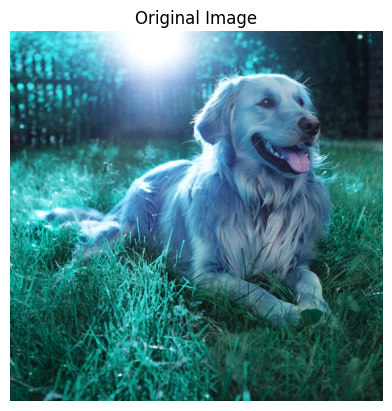

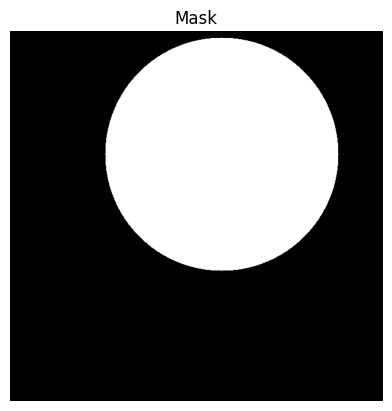

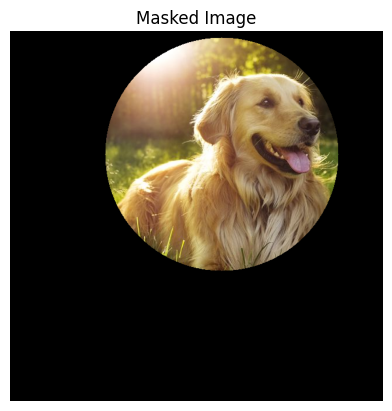

In [28]:
# Show masked region and result
masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=mask)
show("Original Image", img)
show("Mask", mask, cmap="gray")
show("Masked Image", masked_img)


####  4. 2D Histogram 

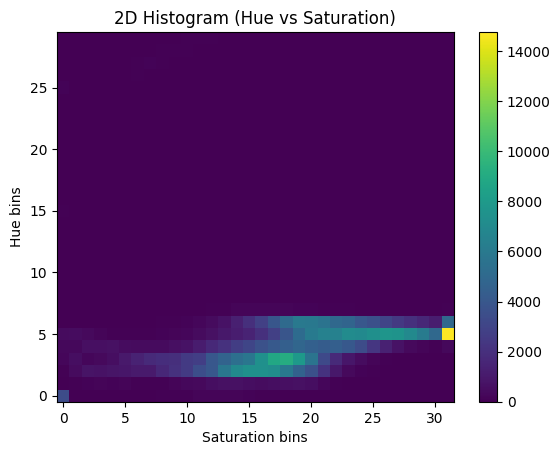

In [26]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hist2d = cv.calcHist([hsv], [0,1], None, [30,32], [0,180,0,256])

plt.figure()
plt.imshow(hist2d, interpolation="nearest", origin="lower", aspect="auto")
plt.title("2D Histogram (Hue vs Saturation)")
plt.xlabel("Saturation bins")
plt.ylabel("Hue bins")
plt.colorbar()
plt.show()